In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
df=pd.read_csv('gld_price_data.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.shape

(2290, 6)

In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation
- positive
- Negative

In [8]:
correlation=df.corr()

C:\Users\wajah\AppData\Local\Temp\ipykernel_17700\1332955121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<AxesSubplot: >

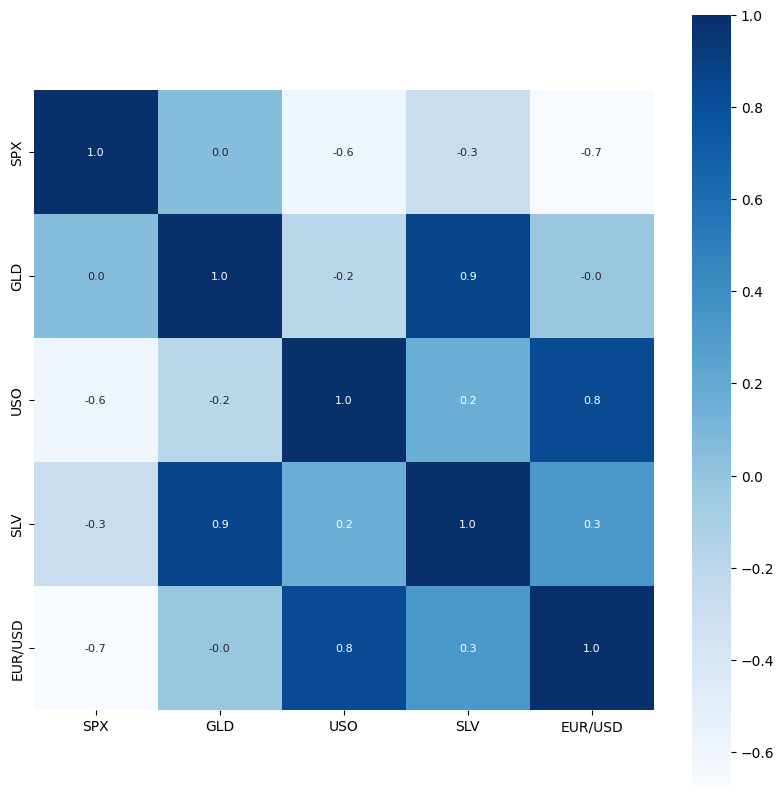

In [9]:
## construction heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

In [10]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\wajah\AppData\Local\Temp\ipykernel_17700\3030281137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<AxesSubplot: xlabel='GLD', ylabel='Density'>

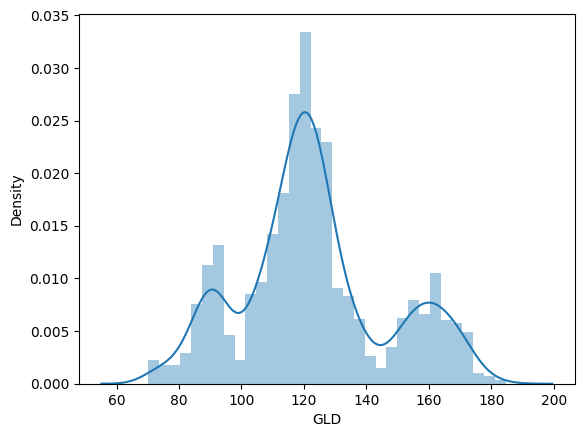

In [11]:
sns.distplot(df['GLD'])

In [13]:
## Seperate data and label
X=df.drop(['Date','GLD'],axis=1)
Y=df['GLD']

In [14]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [17]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
model=RandomForestRegressor(n_estimators=1000)

In [23]:
model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000)

In [24]:
test_prediction = model.predict(X_test)

In [25]:
test_prediction

array([168.51659929,  81.97574989, 115.91521011, 127.63018069,
       120.76856127, 154.69321752, 150.3364584 , 126.08272029,
       117.47722873, 126.01913053, 116.68741108, 171.71356096,
       141.45632832, 167.81697844, 115.22659   , 117.50670048,
       138.56179309, 169.9301206 , 159.45082299, 158.34194938,
       155.15794   , 125.29804023, 176.00092959, 157.18250315,
       125.20949047,  93.82114982,  77.39526018, 120.55419   ,
       119.08643932, 167.4658699 ,  88.1759605 , 125.3127101 ,
        91.16522071, 117.72932013, 121.11672923, 136.48421082,
       115.45889131, 115.29455081, 147.88341989, 107.25153105,
       104.49009255,  87.23471787, 126.50815049, 117.96260993,
       153.26802908, 119.61252999, 108.38004999, 108.11178818,
        93.17155047, 127.17618758,  74.94689031, 113.64509919,
       121.34211019, 111.23992911, 118.87771887, 120.71841942,
       159.15703013, 168.14012105, 147.05251669,  85.84180863,
        94.25924035,  86.84953889,  90.59671007, 118.97

In [27]:
## R squared error

In [28]:
error_score=metrics.r2_score(Y_test,test_prediction)

In [29]:
error_score

0.9891880594842165

### Compare actual and predicted values

In [30]:
Y_test=list(Y_test)

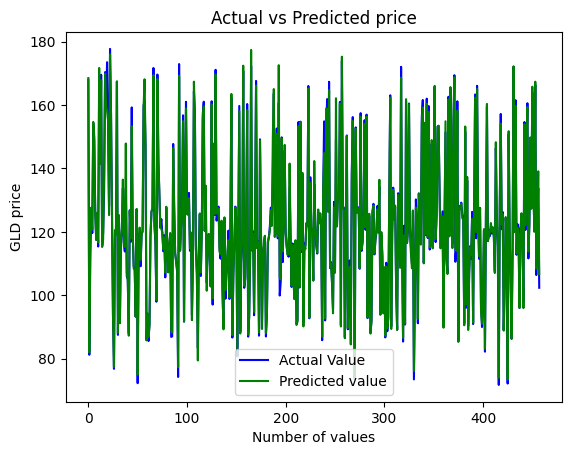

In [32]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_prediction,color='green',label='Predicted value')
plt.title('Actual vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()